In [1]:
import numpy as np
import matplotlib.pyplot as plt

Latihan 1

In [5]:
x = [
    [
        [5, 1, 2],
        [2, 6, 1],
        [1, 1, 7]
    ],
    [
        [10, 2, -1],
        [1, 8, 2],
        [2, -1, 9]
    ],
    [
        [6, -1, 1],
        [3, 7, 2],
        [2, -2, 8]
    ],
    [
        [4, 2, 1],
        [1, 5, 2],
        [3, 1, 6]
    ],
    [
        [8, -1, 2],
        [1, 9, 1],
        [2, 3, 10]
    ]
]
y = [
    [12, 14, 17],
    [13, 18, 16],
    [11, 19, 14],
    [10, 13, 15],
    [17, 14, 19]
]

def diagonal_dominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    off_diag = np.sum(np.abs(x), axis = 1) - diag
    result = np.all(diag > off_diag)
    return result

def gauss_seidel(x, y, tol = 0.001, max_iter = 45):
    if not diagonal_dominant(x):
        print("Not Diagonal Dominant")
        return
    
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    old_res = np.zeros(len(x[0]))

    for i in range(max_iter):
        new_res = np.array(old_res)

        for idx, row in enumerate(x):
            new_res[idx] = (y[idx] + np.dot(row, new_res)) / diag[idx]

        print(f"iteration {i+1} : {new_res}")

        distance = np.sqrt(np.dot(old_res-new_res, old_res-new_res))

        if distance < tol:
            print("Converged")
            print(f"Result : {new_res}")
            return
        
        old_res = new_res

for i in range(0,3):
    print(f"System {i+1} : ")
    gauss_seidel(x[i], y[i])

System 1 : 
iteration 1 : [2.4        1.53333333 1.86666667]
iteration 2 : [1.34666667 1.57333333 2.01142857]
iteration 3 : [1.2807619  1.5711746  2.02115193]
iteration 4 : [1.27730431 1.57070658 2.02171273]
iteration 5 : [1.27717359 1.57065668 2.02173853]
Converged
Result : [1.27717359 1.57065668 2.02173853]
System 2 : 
iteration 1 : [1.3        2.0875     1.72083333]
iteration 2 : [1.05458333 1.68796875 1.73097801]
iteration 3 : [1.13550405 1.67531749 1.71158993]
iteration 4 : [1.13609549 1.68009058 1.71198884]
iteration 5 : [1.13518077 1.68010519 1.71219374]
Converged
Result : [1.13518077 1.68010519 1.71219374]
System 3 : 
iteration 1 : [1.83333333 1.92857143 1.77380952]
iteration 2 : [1.85912698 1.41071429 1.63789683]
iteration 3 : [1.79546958 1.47682823 1.67033966]
iteration 4 : [1.80108143 1.46515377 1.66601809]
iteration 5 : [1.79985595 1.46691371 1.66676444]
iteration 6 : [1.80002488 1.46662807 1.6666508 ]
Converged
Result : [1.80002488 1.46662807 1.6666508 ]


Linear Regre

Alpha : [[2.]
 [1.]]


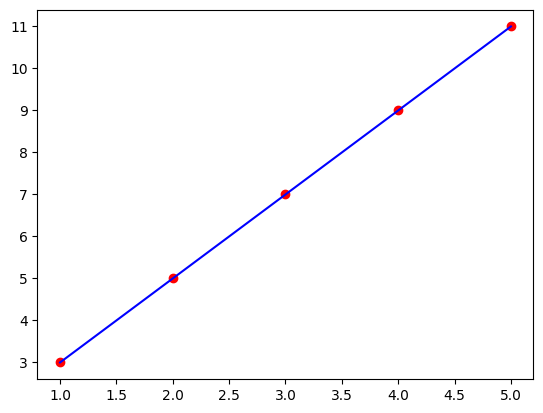

In [8]:
x = [1, 2, 3, 4, 5]
y = [3, 5, 7, 9, 11]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = y[:, np.newaxis]
alpha = np.linalg.inv(np.dot(A.T, A))
alpha = np.dot(alpha, A.T)
alpha = np.dot(alpha, Y)

print(f"Alpha : {alpha}")

plt.plot(x, y, "ro")
plt.plot(x, alpha[0]*x+alpha[1], "b-")
plt.show()

newton raphson 

In [9]:
def f(x):
    return x**3 - x - 2

def g(x):
    return 3 * (x**2) - 1

def newton_raphson(x, tol = 0.01, max_iter = 20):
    found = False
    for i in range(max_iter):
        x = x - (f(x)/g(x))

        print(f"iteration {i+1} : {x}")

        if np.abs(f(x)) < tol:
            print(f"Found root at {i+1} iteration: {x}")
            found = True
            return
    
    if found == False:
        print("Error")
        return

newton_raphson(1.5)
    



iteration 1 : 1.5217391304347827
Found root at 1 iteration: 1.5217391304347827


Intergration

In [10]:
def f(x):
    return x**2 + 2*x + 1

a = 1
b = 5
n = 1000

width = (b-a) / (n-1)
x = np.linspace(a, b, n)
y = f(x)

right_rieman = width * np.sum(f(x[1:]))

mid = (x[:-1] + x[1:]) / 2
mid_rieman = width * np.sum(f(mid))

print(f"right : {right_rieman}")
print(f"mid : {mid_rieman}")

right : 69.39740808542943
mid : 69.33332798931731
